# <font color=green>TP FINAL - ALGORITHMES D'APPRENTISSAGE SUPERVISÉ</font>

- Ricardo Vallejo
- Yulia Kalugina

#  <font color=blue>1.  LOAD DATA</font>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import numpy as np
import scipy.stats
import seaborn as sns

dataOriginal = pd.read_csv("covid.csv")
pd.set_option('display.max_rows', None)
dataOriginal = dataOriginal.head(50)
dataOriginal.head(5)

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2,1,04-05-2020,02-05-2020,9999-99-99,97,2,27,97,...,2,2,2,2,2,2,2,2,1,97
1,1009bf,2,1,19-03-2020,17-03-2020,9999-99-99,97,2,24,97,...,2,2,2,2,2,2,2,99,1,97
2,167386,1,2,06-04-2020,01-04-2020,9999-99-99,2,2,54,2,...,2,2,2,2,1,2,2,99,1,2
3,0b5948,2,2,17-04-2020,10-04-2020,9999-99-99,2,1,30,97,...,2,2,2,2,2,2,2,99,1,2
4,0d01b5,1,2,13-04-2020,13-04-2020,22-04-2020,2,2,60,2,...,2,1,2,1,2,2,2,99,1,2


## 1.1. LOAD METADA

In [2]:
cat_si_no = pd.read_excel("Catalogs.xlsx", 'Catálogo SI_NO')
pd.set_option('display.max_rows', None)
cat_si_no.head(5)

,CLAVE,DESCRIPCIÓN
0,1,SI
1,2,NO
2,97,NO APLICA
3,98,SE IGNORA
4,99,NO ESPECIFICADO


In [3]:
cat_pacient_type = pd.read_excel("Catalogs.xlsx", 'Catálogo TIPO_PACIENTE')
pd.set_option('display.max_rows', None)
cat_pacient_type.head(5)

,CLAVE,DESCRIPCIÓN
0,1,AMBULATORIO
1,2,HOSPITALIZADO
2,99,NO ESPECIFICADO


In [4]:
cat_sex = pd.read_excel("Catalogs.xlsx", 'Catálogo SEXO')
pd.set_option('display.max_rows', None)
cat_sex.head(5)

,CLAVE,DESCRIPCIÓN
0,1,MUJER
1,2,HOMBRE
2,99,NO ESPECIFICADO


In [5]:
cat_result = pd.read_excel("Catalogs.xlsx", 'Catálogo RESULTADO')
pd.set_option('display.max_rows', None)
cat_sex.head(5)

,CLAVE,DESCRIPCIÓN
0,1,MUJER
1,2,HOMBRE
2,99,NO ESPECIFICADO


<div style="page-break-after: always;"></div>

## <font color=blue>2. IDENTIFYING MODEL VARIABLES </font>


In [6]:
dataInfo = pd.read_excel("covidInfo.xlsx", "DataTypes")
pd.set_option('display.max_rows', None)
dataInfo

,Variable Name,DB Type,Model Type,CATALOG
0,id,String,Non informative,N.A
1,sex,int,"Categorical, Numerical, Non-ordinal, Nominal",Catálogo SEXO
2,patient_type,String / Date,"Categorical, Numerical, Non-ordinal, Nominal",Catálogo TIPO_PACIENTE
3,entry_date,String / Date,Date,N.A
4,date_symptoms,String / Date,Date,N.A
5,date_died,String / Date,Date,N.A
6,intubed,int,"Categorical, Numerical, Non-ordinal, Nominal",Catálogo SI_NO
7,pneumonia,int,"Categorical, Numerical, Non-ordinal, Nominal",Catálogo SI_NO
8,age,int,"Quantitative, Numerical, Non-ordinal, Nominal",N.A
9,pregnancy,int,"Categorical, Numerical, Non-ordinal, Nominal",Catálogo SI_NO


In [7]:
# All labels
datalabels = ['id', 'sex', 'patient_type', 'entry_date', 'date_symptoms',
              'date_died','intubed','pneumonia','age','pregnancy','diabetes','copd','asthma','inmsupr','hypertension',
              'other_disease','cardiovascular','obesity','renal_chronic','tobacco','contact_other_covid'
              ,'covid_res','icu']

# Ignored: id, entrydate, date_symptons, date_died, icu
predictors = ['sex', 'patient_type',
              'intubed','pneumonia','age','pregnancy','diabetes','copd','asthma','inmsupr','hypertension',
              'other_disease','cardiovascular','obesity','renal_chronic','tobacco',
              'contact_other_covid','covid_res']

target_column= 'icu'

model_columns = ['sex', 'patient_type',
              'intubed','pneumonia','age','pregnancy','diabetes','copd','asthma','inmsupr','hypertension',
              'other_disease','cardiovascular','obesity','renal_chronic','tobacco',
              'contact_other_covid','covid_res', target_column]

prefered_columns = ['sex','cardiovascular','obesity','tobacco','contact_other_covid','covid_res', target_column]

<div style="page-break-after: always;"></div>

#  <font color=blue>3. DATA EXPLORATION</font>

# 3.1.  Inspecting for types and Null values detection

In [8]:
dataOriginal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   50 non-null     object
 1   sex                  50 non-null     int64 
 2   patient_type         50 non-null     int64 
 3   entry_date           50 non-null     object
 4   date_symptoms        50 non-null     object
 5   date_died            50 non-null     object
 6   intubed              50 non-null     int64 
 7   pneumonia            50 non-null     int64 
 8   age                  50 non-null     int64 
 9   pregnancy            50 non-null     int64 
 10  diabetes             50 non-null     int64 
 11  copd                 50 non-null     int64 
 12  asthma               50 non-null     int64 
 13  inmsupr              50 non-null     int64 
 14  hypertension         50 non-null     int64 
 15  other_disease        50 non-null     int64 
 16  cardiovasc

In [9]:
dataOriginal.isnull().values.sum()

0

# 3.1.1.  Searching odd information in numerical descriptor - AGE

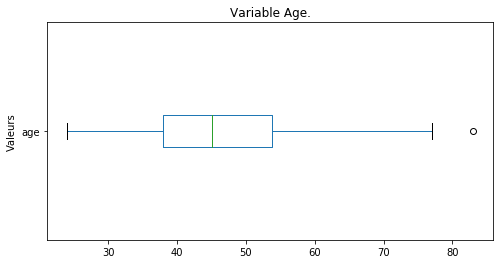

In [10]:
#Diagram de moustache

dataOriginal.boxplot(column='age', figsize=(8,4), vert=False)
plt.ylabel("Valeurs")
plt.title("Variable Age." )
plt.grid()
plt.show()

<font color='blue'>We filter data with ages with outliers?</font>

In [11]:
dataModel =  dataOriginal[dataOriginal['age']<95]

In [12]:
dataModel.shape[0] - dataOriginal.shape[0]

0

<div style="page-break-after: always;"></div>

# 3.2. Inspecting quantitative variables - Age

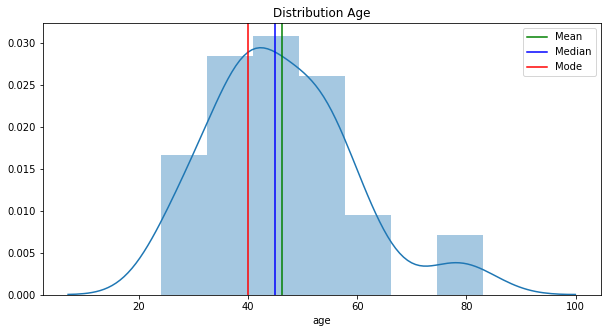

In [13]:
import seaborn as sns

mean=dataModel['age'].mean();
median=dataModel['age'].median();
mode=dataModel['age'].mode();
fig, ax = plt.subplots(figsize=(10,5));

sns.distplot(dataModel['age']);
plt.title('Distribution Age');
plt.axvline(mean,color='green',label='Mean'); 
plt.axvline(median,color='blue',label='Median');
plt.axvline(mode[0],color='red',label='Mode')

plt.legend();

In [14]:
mean

46.14

In [15]:
mode

0    40
1    53
2    54
3    56
dtype: int64

# 3.3. Inspecting categorical variables 

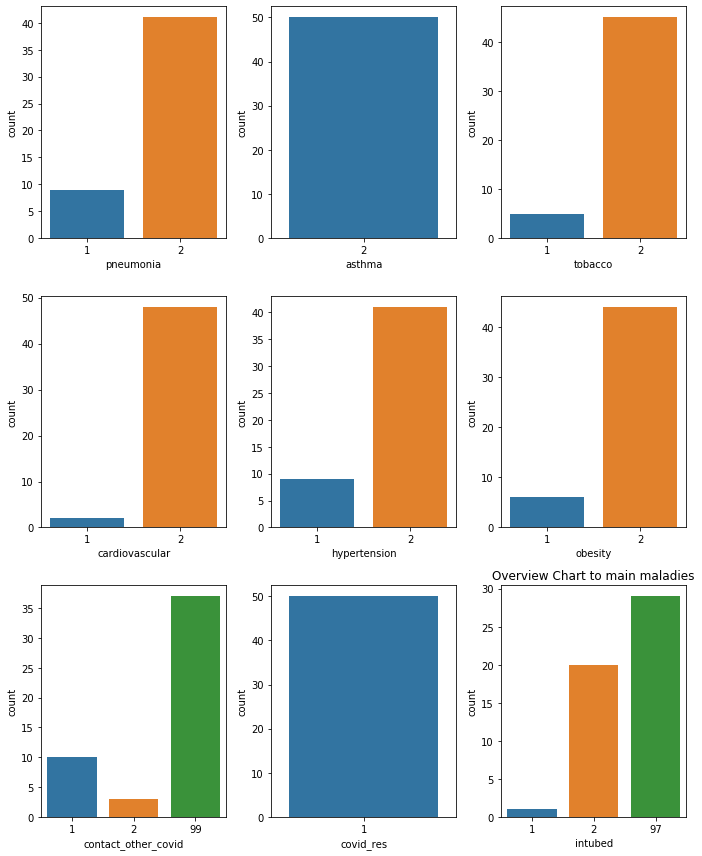

In [16]:
import matplotlib.pyplot as plt


fig, ax =plt.subplots(3,3)
 
fig.set_size_inches(10, 12, forward=True)
plt.title("Overview Chart to main maladies")

sns.countplot(x='pneumonia', data=dataModel, ax=ax[0,0])
sns.countplot(x='asthma', data=dataModel, ax=ax[0,1])
sns.countplot(x='tobacco', data=dataModel, ax=ax[0,2])

sns.countplot(x='cardiovascular', data=dataModel, ax=ax[1,0])
sns.countplot(x='hypertension', data=dataModel, ax=ax[1,1])
sns.countplot(x='obesity', data=dataModel, ax=ax[1,2])

sns.countplot(x='contact_other_covid', data=dataModel, ax=ax[2,0])
sns.countplot(x='covid_res', data=dataModel, ax=ax[2,1])
sns.countplot(x='intubed', data=dataModel, ax=ax[2,2])
#fig.legend() use handles
fig.tight_layout()


In [17]:
cat_si_no

,CLAVE,DESCRIPCIÓN
0,1,SI
1,2,NO
2,97,NO APLICA
3,98,SE IGNORA
4,99,NO ESPECIFICADO


## Calculate numerical values

In [18]:
pd.DataFrame(dataModel['pneumonia'].value_counts())

,pneumonia
2,41
1,9


In [19]:
pd.DataFrame(dataModel['asthma'].value_counts())

,asthma
2,50


In [20]:
pd.DataFrame(dataModel['tobacco'].value_counts())

,tobacco
2,45
1,5


In [21]:
pd.DataFrame(dataModel['pregnancy'].value_counts())

,pregnancy
97,25
2,25


## 3.3.1.  Inspecting categorical variables using bivariable relatioships with sex of patients.


In [22]:
cat_sex

,CLAVE,DESCRIPCIÓN
0,1,MUJER
1,2,HOMBRE
2,99,NO ESPECIFICADO


In [23]:
cat_si_no

,CLAVE,DESCRIPCIÓN
0,1,SI
1,2,NO
2,97,NO APLICA
3,98,SE IGNORA
4,99,NO ESPECIFICADO


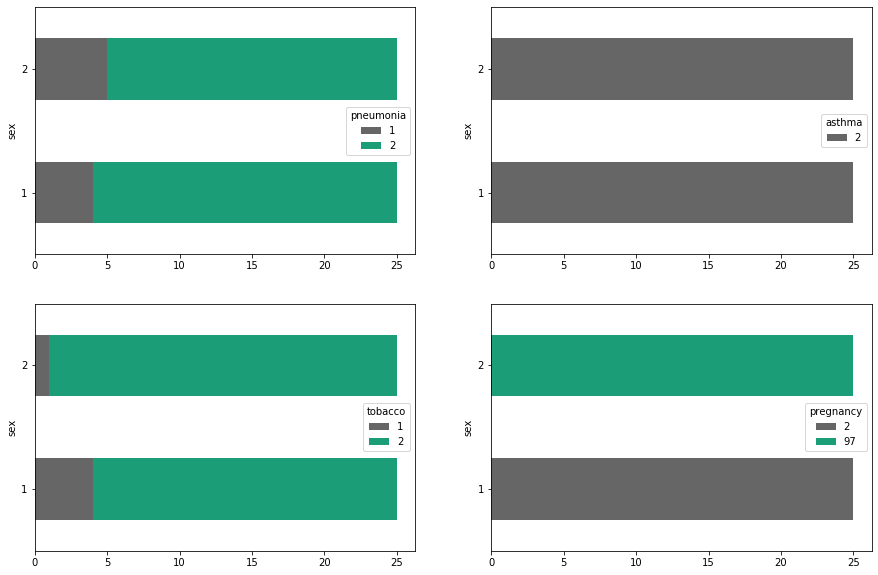

In [24]:
fig, axs = plt.subplots(2,2)

pneumonia_bySex= dataModel.pivot_table(index='sex', columns='pneumonia', values='icu', aggfunc='count')
pneumonia_bySex.plot(kind='barh', stacked=True, figsize=[15,10], colormap='Dark2_r',ax=axs[0,0])

asthma_bySex= dataModel.pivot_table(index='sex', columns='asthma', values='icu', aggfunc='count')
asthma_bySex.plot(kind='barh', stacked=True, figsize=[15,10], colormap='Dark2_r',ax=axs[0,1])

tobacco_bySex= dataModel.pivot_table(index='sex', columns='tobacco', values='icu', aggfunc='count')
tobacco_bySex.plot(kind='barh', stacked=True, figsize=[15,10], colormap='Dark2_r',ax=axs[1,0])
,
pregnancy_bySex= dataModel.pivot_table(index='sex', columns='pregnancy', values='icu', aggfunc='count')
pregnancy_bySex.plot(kind='barh', stacked=True, figsize=[15,10], colormap='Dark2_r',ax=axs[1,1])



## Calculate numerical values

In [25]:
pneumonia_bySex

pneumonia,1,2
sex,,
1,4,21
2,5,20


In [26]:
tobacco_bySex

tobacco,1,2
sex,,
1,4,21
2,1,24


In [27]:
asthma_bySex

asthma,2
sex,
1,25
2,25


In [28]:
pregnancy_bySex

pregnancy,2,97
sex,,
1,25.0,NaN
2,NaN,25.0


# 3.3.2. Inspecting categorical variables using bivariable relatioships with ICU (Intensive Care Medical Unit) reference

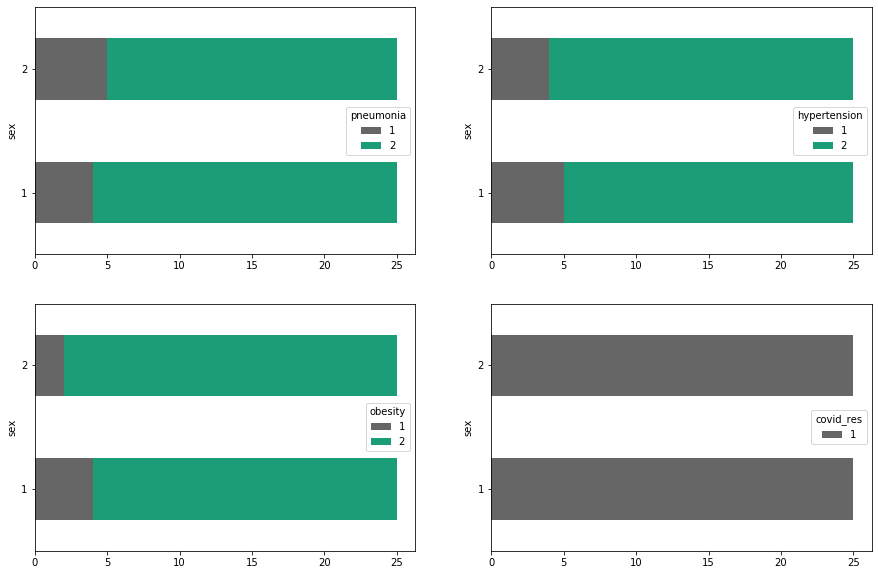

In [29]:
fig, axs = plt.subplots(2,2)

cardiovascular_bySex= dataModel.pivot_table(index='sex', columns='cardiovascular', values='icu', aggfunc='count')
pneumonia_bySex.plot(kind='barh', stacked=True, figsize=[15,10], colormap='Dark2_r',ax=axs[0,0])

hypertension_bySex= dataModel.pivot_table(index='sex', columns='hypertension', values='icu', aggfunc='count')
hypertension_bySex.plot(kind='barh', stacked=True, figsize=[15,10], colormap='Dark2_r',ax=axs[0,1])

obesity_bySex= dataModel.pivot_table(index='sex', columns='obesity', values='icu', aggfunc='count')
obesity_bySex.plot(kind='barh', stacked=True, figsize=[15,10], colormap='Dark2_r',ax=axs[1,0])

covid_res_bySex= dataModel.pivot_table(index='sex', columns='covid_res', values='icu', aggfunc='count')
covid_res_bySex.plot(kind='barh', stacked=True, figsize=[15,10], colormap='Dark2_r',ax=axs[1,1])


In [30]:
cardiovascular_bySex

cardiovascular,1,2
sex,,
1,2.0,23.0
2,NaN,25.0


In [31]:
hypertension_bySex

hypertension,1,2
sex,,
1,5,20
2,4,21


In [32]:
obesity_bySex

obesity,1,2
sex,,
1,4,21
2,2,23


In [33]:
covid_res_bySex

covid_res,1
sex,
1,25
2,25


## Inspecting relationship between categorical variables - Diseases vs ICU assignation - Overview respiratory diseases

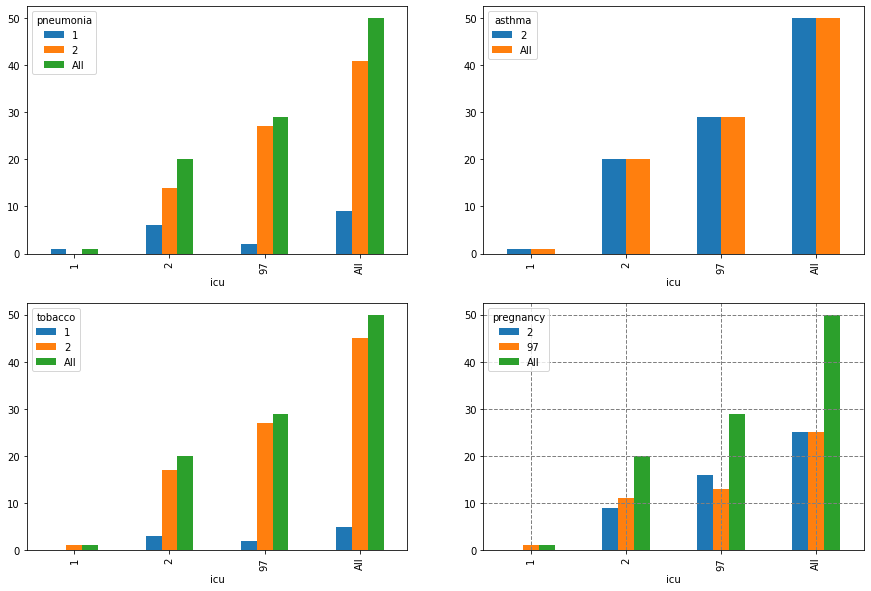

In [34]:
fig, axs = plt.subplots(2,2)
pneumonia_byICU = pd.crosstab(index=dataModel['icu'],
            columns=dataModel['pneumonia'], 
            margins=True)
pneumonia_byICU.plot(kind='bar',ax=axs[0,0], figsize=[15,10])
plt.grid(color='gray', linestyle='--', linewidth=1)
#plt.ylabel("Frequency")
#plt.title('Relationship between Asthma diagnostic and ICU assignation COVID')
asthma_byICU = pd.crosstab(index=dataModel['icu'],
            columns=dataModel['asthma'], 
            margins=True)
asthma_byICU.plot(kind='bar',ax=axs[0,1])
plt.grid(color='gray', linestyle='--', linewidth=1)
#plt.ylabel("Frequency")
#plt.title('Relationship between Tobacco diagnostic and ICU assignation COVID')
tobacco_byICU = pd.crosstab(index=dataModel['icu'],
            columns=dataModel['tobacco'], 
            margins=True)
tobacco_byICU.plot(kind='bar',ax=axs[1,0])
plt.grid(color='gray', linestyle='--', linewidth=1)
#plt.ylabel("Frequency")
#plt.title('Relationship between Pregnancy diagnostic and ICU assignation COVID')
pregnancy_byICU = pd.crosstab(index=dataModel['icu'],
            columns=dataModel['pregnancy'], 
            margins=True)
pregnancy_byICU.plot(kind='bar',ax=axs[1,1])
plt.grid(color='gray', linestyle='--', linewidth=1)
#plt.ylabel("Frequency")
#plt.title('Relationship between Pneumonia diagnostic and ICU assignation COVID')


In [35]:
pneumonia_byICU

pneumonia,1,2,All
icu,,,
1,1,0,1
2,6,14,20
97,2,27,29
All,9,41,50


In [36]:
asthma_byICU

asthma,2,All
icu,,
1,1,1
2,20,20
97,29,29
All,50,50


In [37]:
tobacco_byICU

tobacco,1,2,All
icu,,,
1,0,1,1
2,3,17,20
97,2,27,29
All,5,45,50


In [38]:
pregnancy_byICU

pregnancy,2,97,All
icu,,,
1,0,1,1
2,9,11,20
97,16,13,29
All,25,25,50


## Inspecting relationship between diseases and ICU assignation - Overview General diseases

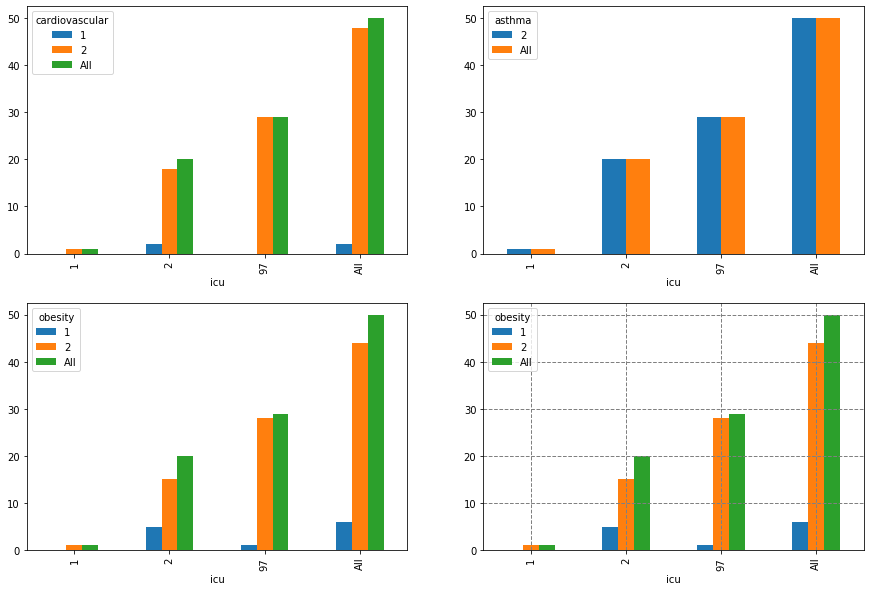

In [39]:
fig, axs = plt.subplots(2,2)
cardiovascular_byICU = pd.crosstab(index=dataModel['icu'],
            columns=dataOriginal['cardiovascular'], 
            margins=True)
cardiovascular_byICU.plot(kind='bar',ax=axs[0,0], figsize=[15,10])
plt.grid(color='gray', linestyle='--', linewidth=1)
#plt.ylabel("Frequency")
#plt.title('Relationship between Asthma diagnostic and ICU assignation COVID')
hypertension_byICU = pd.crosstab(index=dataModel['icu'],
            columns=dataOriginal['hypertension'], 
            margins=True)
asthma_byICU.plot(kind='bar',ax=axs[0,1])
plt.grid(color='gray', linestyle='--', linewidth=1)
#plt.ylabel("Frequency")
#plt.title('Relationship between Tobacco diagnostic and ICU assignation COVID')
obesity_byICU = pd.crosstab(index=dataModel['icu'],
            columns=dataOriginal['obesity'], 
            margins=True)
obesity_byICU.plot(kind='bar',ax=axs[1,0])
plt.grid(color='gray', linestyle='--', linewidth=1)
#plt.ylabel("Frequency")
#plt.title('Relationship between Pregnancy diagnostic and ICU assignation COVID')
obesity_byICU = pd.crosstab(index=dataModel['icu'],
            columns=dataOriginal['obesity'], 
            margins=True)
obesity_byICU.plot(kind='bar',ax=axs[1,1])
plt.grid(color='gray', linestyle='--', linewidth=1)
#plt.ylabel("Frequency")
#plt.title('Relationship between Pneumonia diagnostic and ICU assignation COVID')


# 3.3.  Analysis variable quantitative vs qualitative

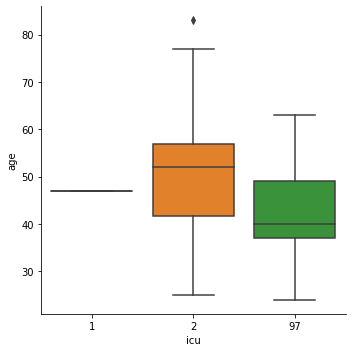

In [40]:
sns.catplot(x="icu", y="age", kind="box", data=dataModel)

# 4.  Classes identification

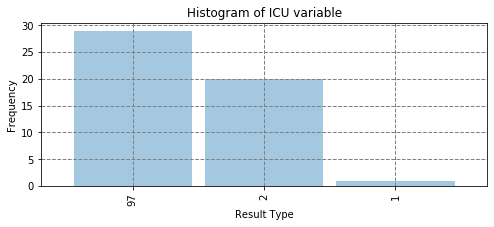

In [41]:
targetOriginal = dataModel['icu']
E1 = targetOriginal.value_counts()
E1.plot(kind = 'bar',
           stacked = 'True',          # Muestra las barras apiladas
           alpha = 0.4,               # nivel de transparencia
           width = 0.9,               # Grosor de las barras para dejar espacio entre ellas
           figsize=(8,3));

plt.grid(color='gray', linestyle='--', linewidth=1)
plt.title('Histogram of ICU variable')
plt.xlabel("Result Type")
plt.ylabel("Frequency")
plt.show()



In [42]:
cat_si_no

,CLAVE,DESCRIPCIÓN
0,1,SI
1,2,NO
2,97,NO APLICA
3,98,SE IGNORA
4,99,NO ESPECIFICADO


In [43]:
E1

97    29
2     20
1      1
Name: icu, dtype: int64

## 3.2. Check the distribution or instances of any class

In [44]:
pd.DataFrame(targetOriginal.value_counts())

,icu
97,29
2,20
1,1


In [45]:
pd.DataFrame(targetOriginal.value_counts(normalize=True) * 100)

,icu
97,58.0
2,40.0
1,2.0


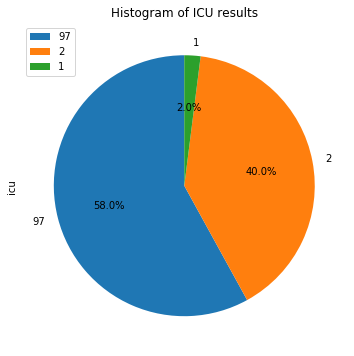

In [46]:
E2 = targetOriginal.value_counts(normalize=True)
E2.plot.pie(subplots=True, figsize = (6,6), autopct = '%1.1f%%', startangle = 90)
plt.title('Histogram of ICU results')
plt.legend(E2.index, loc = 'upper left', fontsize = 10)
plt.show() #ok


#?? Sur tout les data ou seulement sur les donnes ou ilya ICU??

# <font color=blue>4.  IMPUTATION AND DETECTION OF NULL AND ODD VALUES.</font>

## Check for null values in the dataset

In [47]:
dataModel.isnull().values.sum()

0

In [48]:
dataModel.isnull().values.sum()

0

# <font color=blue> 5.  CORRELATION ANALYSIS</font>

## 5.1 Correlation Matrix

# <font color="blue">6.  VARIABLE REDUCTION</font>

https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/

<font color="red"> Jai essaie Variance Tresholding, normalisation et standarisation, mais ca marche pas pour notre cas.<font>


# 6.2.  Chi-Squared Feature Selection

Pearson’s chi-squared statistical hypothesis test is an example of a test for independence between categorical variables

The degree of association between predictor and outcome can be measured with statistics such as X2 (chi-squared) tests.


1.Define Hypothesis
Null Hypothesis (H0): Two variables are independent.
Alternate Hypothesis (H1): Two variables are not independent.

In [49]:
import scipy.stats as ss #import chi2_contingency


def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return round(np.sqrt(phi2corr/min((kcorr-1),(rcorr-1))),3)


cramers_v(dataModel['pneumonia'], dataModel['sex'])


0.0

In [50]:

cramers_v(dataModel['hypertension'], dataModel['obesity'])

0.0

In [51]:
df2 = pd.DataFrame(columns=model_columns, index=model_columns)
for i in range(len(model_columns)):
    for j in range(len(model_columns)):
        fname = model_columns[i]
        cname = model_columns[j]
        df2.loc[fname, cname] = cramers_v(dataModel[fname], dataModel[cname])

display(df2)

C:\Users\valm044\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]


,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
sex,0.959,0,0.038,0,0.333,0.959,0,0,NaN,0,0,0,0,0,0,0,0.229,NaN,0
patient_type,0,0.958,0.99,0.251,0.246,0,0.19,0,NaN,0,0,0,0,0.203,0,0,0.265,NaN,0.99
intubed,0.038,0.99,1,0.375,0.032,0.038,0.241,0.149,NaN,0,0,0,0.149,0.417,0,0,0.124,NaN,0.693
pneumonia,0,0.251,0.375,0.931,0,0,0,0,NaN,0,0,0,0,0,0,0,0,NaN,0.375
age,0.333,0.246,0.032,0,1,0.333,0.18,0.414,NaN,0.661,0.371,0,0.661,0,0,0,0.091,NaN,0
pregnancy,0.959,0,0.038,0,0.333,0.959,0,0,NaN,0,0,0,0,0,0,0,0.229,NaN,0
diabetes,0,0.19,0.241,0,0.18,0,0.924,0,NaN,0,0.048,0,0.299,0,0,0,0,NaN,0.356
copd,0,0,0.149,0,0.414,0,0,0.733,NaN,0.307,0,0.307,0.167,0,0.307,0,0,NaN,0.149
asthma,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
inmsupr,0,0,0,0,0.661,0,0,0.307,NaN,0.473,0,0.473,0.307,0.087,0.473,0.127,0,NaN,0


In [52]:
df2.shape

(19, 19)

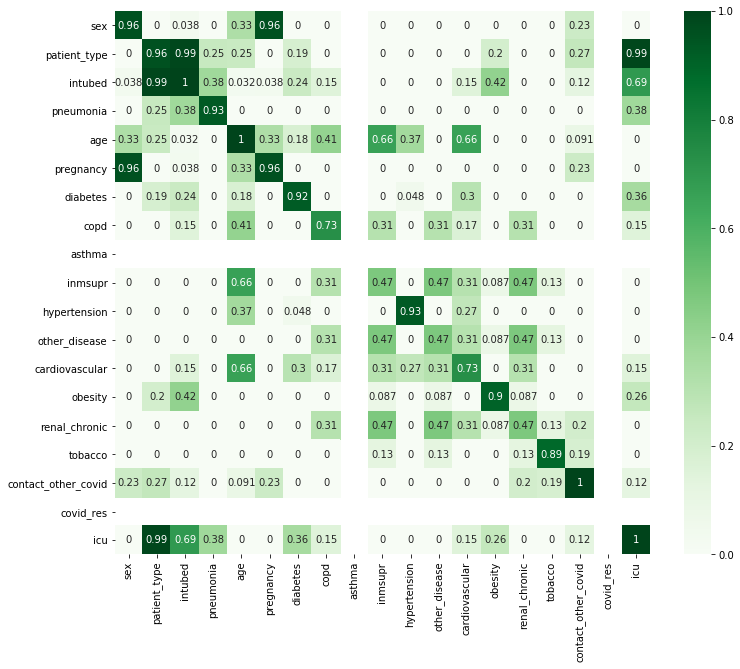

In [53]:
import seaborn as sns

df2 = df2.astype('float')  # !! Neccessary for Heatmap

plt.figure(figsize=(12,10))
sns.heatmap(df2, annot=True, cmap="Greens")
plt.show()

# <font color="blue">7.  MODELISATION & PREDICTION</font>

## <font color="blue">7.1.  Splitting DATA to create Training and Test sets.</font>

In [54]:
# Labels for descriptors

datalabels = ['id', 'sex', 'patient_type', 'entry_date', 'date_symptoms',
              'date_died','intubed','pneumonia','age','pregnancy','diabetes','copd','asthma','inmsupr','hypertension',
              'other_disease','cardiovascular','obesity','renal_chronic','tobacco','contact_other_covid'
              ,'covid_res','icu']

# Ignored: id, entrydate, date_symptons, date_died, icu
predictors = ['sex', 'age','pneumonia','contact_other_covid','covid_res',
              'pregnancy','diabetes','copd','asthma','inmsupr',
              'hypertension','other_disease','cardiovascular','obesity','renal_chronic','tobacco'
             ]

target_column= 'icu'

target_column2 = 'intubed'

model_columns = ['sex', 'age','pneumonia','contact_other_covid','covid_res',
              'pregnancy','diabetes','copd','asthma','inmsupr',
              'hypertension','other_disease','cardiovascular','obesity','renal_chronic','tobacco', target_column]


# Split in traning and test sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =train_test_split(dataModel[predictors], 
                                                   dataModel[target_column], 
                                                   test_size=0.20, random_state=44)



In [55]:
print("Size training set: ", X_train.shape)
print("Size test set: ", X_test.shape)



Size training set:  (40, 16)
Size test set:  (10, 16)


# 7.1 KNN

In [56]:
from sklearn import neighbors, datasets
import time

startTimeKNN = time.time()
weights = 'uniform'
k_neighbors = 15
model1 = neighbors.KNeighborsClassifier(weights=weights)
model1.fit(X_train, y_train.values.ravel())
endtimeKNN = time.time()


In [57]:
KNN_sec=endtimeKNN - startTimeKNN
KNN_sec

0.003208637237548828

## 7.1.1  Model Evaluation

In [58]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 37 to 17
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   sex                  10 non-null     int64
 1   age                  10 non-null     int64
 2   pneumonia            10 non-null     int64
 3   contact_other_covid  10 non-null     int64
 4   covid_res            10 non-null     int64
 5   pregnancy            10 non-null     int64
 6   diabetes             10 non-null     int64
 7   copd                 10 non-null     int64
 8   asthma               10 non-null     int64
 9   inmsupr              10 non-null     int64
 10  hypertension         10 non-null     int64
 11  other_disease        10 non-null     int64
 12  cardiovascular       10 non-null     int64
 13  obesity              10 non-null     int64
 14  renal_chronic        10 non-null     int64
 15  tobacco              10 non-null     int64
dtypes: int64(16)
memory usage: 

In [59]:
X_test.head(5)

,sex,age,pneumonia,contact_other_covid,covid_res,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco
37,2,37,2,99,1,97,2,2,2,2,2,2,2,2,2,2
6,2,63,2,99,1,97,2,2,2,2,1,2,2,2,2,2
47,2,53,2,99,1,97,2,2,2,2,2,2,2,2,2,2
36,2,77,1,99,1,97,2,2,2,2,1,2,2,2,2,2
5,2,47,1,99,1,97,1,2,2,2,2,2,2,2,2,2


In [60]:
X_train.head(5)

,sex,age,pneumonia,contact_other_covid,covid_res,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco
31,1,83,2,99,1,2,1,1,2,1,1,2,1,2,2,2
26,1,31,2,99,1,2,2,2,2,2,2,2,2,2,2,2
15,1,34,2,2,1,2,2,2,2,2,2,2,2,2,2,1
13,1,34,2,1,1,2,2,2,2,2,2,2,2,2,2,2
11,1,45,2,99,1,2,2,2,2,2,2,2,2,2,2,2


In [61]:
# METRIQUES

from sklearn import metrics 
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import time

y_predicted_train = model1.predict(X_train)
y_predicted_test = model1.predict(X_test)



In [62]:

startTimeKNN = time.time()
print("Accuracy:", metrics.accuracy_score(y_predicted_train, y_train))

endtimeKNN = time.time()
eval_KNN_sec = endtimeKNN - startTimeKNN
eval_KNN_sec

Accuracy: 0.725


0.0

In [63]:
startTimeKNN = time.time()

print(confusion_matrix(y_test, y_predicted_test))

endtimeKNN = time.time()
EVAL_KNN_sec = endtimeKNN - startTimeKNN
EVAL_KNN_sec

[[0 1 0]
 [0 5 0]
 [0 1 3]]


0.0030024051666259766

In [64]:
print("Precision: ", metrics.precision_score(y_test, y_predicted_test, labels=None, pos_label=1, average='weighted', 
                                        sample_weight=None,zero_division='warn'))

Precision:  0.7571428571428571


C:\Users\valm044\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [65]:

print ("Recall:", metrics.recall_score(y_test, y_predicted_test,  average='macro') )


Recall: 0.5833333333333334


In [66]:
print ("F1 score:", metrics.f1_score(y_test, y_predicted_test, average='macro'))


F1 score: 0.5634920634920634


# 7.2. DESICION TREE

## 7.2.1 DESICION TREE - Entropy

In [67]:
from sklearn import tree
desicionTree = tree.DecisionTreeClassifier(max_depth =3, criterion='entropy', random_state=44, min_samples_leaf=5)
desicionTree.fit(X_train, y_train)



DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=44, splitter='best')

[Text(111.60000000000001, 380.52, 'obesity <= 1.5\nentropy = 0.954\nsamples = 40\nvalue = [15, 25]'),
 Text(55.800000000000004, 271.8, 'entropy = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(167.4, 271.8, 'diabetes <= 1.5\nentropy = 0.863\nsamples = 35\nvalue = [10, 25]'),
 Text(111.60000000000001, 163.07999999999998, 'entropy = 0.918\nsamples = 6\nvalue = [4, 2]'),
 Text(223.20000000000002, 163.07999999999998, 'pneumonia <= 1.5\nentropy = 0.736\nsamples = 29\nvalue = [6, 23]'),
 Text(167.4, 54.360000000000014, 'entropy = 0.971\nsamples = 5\nvalue = [3, 2]'),
 Text(279.0, 54.360000000000014, 'entropy = 0.544\nsamples = 24\nvalue = [3, 21]')]

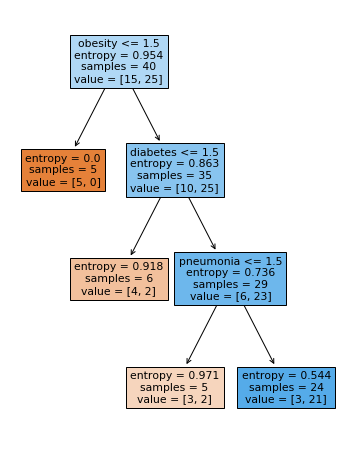

In [68]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

plt.figure(figsize = (6,8))
plot_tree(desicionTree, feature_names = predictors, filled = True)


In [69]:

y_predicted_train = desicionTree.predict(X_train)
y_predicted_test = desicionTree.predict(X_test)



In [70]:

startTimeKNN = time.time()
print("Accuracy:", metrics.accuracy_score(y_predicted_train, y_train))

endtimeKNN = time.time()
eval_KNN_sec = endtimeKNN - startTimeKNN
eval_KNN_sec

Accuracy: 0.825


0.0

In [71]:
print("Precision: ", metrics.precision_score(y_test, y_predicted_test, labels=None, pos_label=1, average='weighted', 
                                        sample_weight=None,zero_division='warn'))

Precision:  0.33809523809523806


C:\Users\valm044\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [72]:

print ("Recall:", metrics.recall_score(y_test, y_predicted_test,  average='macro') )


Recall: 0.31666666666666665


In [73]:
print ("F1 score:", metrics.f1_score(y_test, y_predicted_test, average='macro'))

F1 score: 0.26515151515151514


## 7.22 DESICION TREE - GINI


[Text(186.0, 380.52, 'obesity <= 1.5\ngini = 0.469\nsamples = 40\nvalue = [15, 25]'),
 Text(93.0, 271.8, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(279.0, 271.8, 'copd <= 1.5\ngini = 0.408\nsamples = 35\nvalue = [10, 25]'),
 Text(186.0, 163.07999999999998, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(372.0, 163.07999999999998, 'age <= 30.5\ngini = 0.367\nsamples = 33\nvalue = [8, 25]'),
 Text(279.0, 54.360000000000014, 'gini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(465.0, 54.360000000000014, 'gini = 0.293\nsamples = 28\nvalue = [5, 23]')]

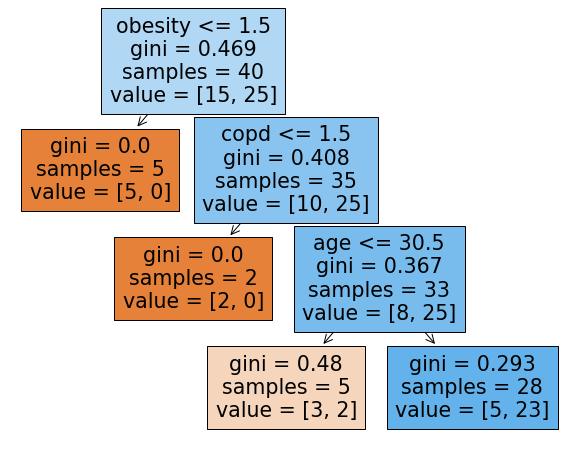

In [74]:
from sklearn import tree
desicionTree = tree.DecisionTreeClassifier(max_depth =3, criterion='gini', random_state=44, min_samples_leaf=2)
desicionTree.fit(X_train, y_train)
plt.figure(figsize = (10,8))
plot_tree(desicionTree, feature_names = predictors, filled = True)


In [75]:
y_predicted_train = desicionTree.predict(X_train)
y_predicted_test = desicionTree.predict(X_test)

In [76]:
startTimeKNN = time.time()
print("Accuracy:", metrics.accuracy_score(y_predicted_train, y_train))

endtimeKNN = time.time()
eval_KNN_sec = endtimeKNN - startTimeKNN
eval_KNN_sec

Accuracy: 0.825


0.0

In [77]:
print("Precision: ", metrics.precision_score(y_test, y_predicted_test, labels=None, pos_label=1, average='weighted', 
                                        sample_weight=None,zero_division='warn'))

Precision:  0.13333333333333333


C:\Users\valm044\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [78]:

print ("Recall:", metrics.recall_score(y_test, y_predicted_test,  average='macro') )


Recall: 0.25


In [79]:
print ("F1 score:", metrics.f1_score(y_test, y_predicted_test, average='macro'))

F1 score: 0.15384615384615385


# 7.3. NAYVE BAYES

In [80]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)





GaussianNB(priors=None, var_smoothing=1e-09)

In [81]:
y_predicted_train = gnb.predict(X_train)
y_predicted_test = gnb.predict(X_test)

In [82]:
startTimeKNN = time.time()
print("Accuracy:", metrics.accuracy_score(y_predicted_train, y_train))

endtimeKNN = time.time()
eval_KNN_sec = endtimeKNN - startTimeKNN
eval_KNN_sec

Accuracy: 0.825


0.0

In [83]:
print("Precision: ", metrics.precision_score(y_test, y_predicted_test, labels=None, pos_label=1, average='weighted', 
                                        sample_weight=None,zero_division='warn'))

Precision:  0.13333333333333333


C:\Users\valm044\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [84]:

print ("Recall:", metrics.recall_score(y_test, y_predicted_test,  average='macro') )

Recall: 0.25


In [85]:
print ("F1 score:", metrics.f1_score(y_test, y_predicted_test, average='macro'))

F1 score: 0.15384615384615385


# <font color="blue">8.  CONCLUSIONS</font>

https://machinelearningmastery.com/compare-machine-learning-algorithms-python-scikit-learn/

# Model Comparation

In [125]:
# Mode iterative:

import pandas as pd
import matplotlib.pyplot as plt
import statistics
import numpy as np
import scipy.stats
import seaborn as sns

from sklearn.model_selection import train_test_split
import time

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

from sklearn import neighbors, datasets
from sklearn import tree
from sklearn.naive_bayes import GaussianNB


In [126]:
def metrics_models(df, model, y_predicted_test,y_test, y_predicted_train, y_train): 
    
    startTime = time.time()
    
    accuracy= metrics.accuracy_score(y_predicted_train, y_train)
    precision =  metrics.precision_score(y_test, y_predicted_test, labels=None, pos_label=1, average='weighted', 
                                        sample_weight=None,zero_division='warn')
    
    recall =  metrics.recall_score(y_test, y_predicted_test,  average='macro') 
    f1Score = metrics.f1_score(y_test, y_predicted_test, average='macro')
    
    endtime = time.time()
    eval_sec = endtime - startTime

   

In [139]:
# Load Data

dataOriginal = pd.read_csv("covid.csv")
pd.set_option('display.max_rows', None)
dataOriginal = dataOriginal.head(50)
dataOriginal.head(5)


# Labels for descriptors

datalabels = ['id', 'sex', 'patient_type', 'entry_date', 'date_symptoms',
              'date_died','intubed','pneumonia','age','pregnancy','diabetes','copd','asthma','inmsupr','hypertension',
              'other_disease','cardiovascular','obesity','renal_chronic','tobacco','contact_other_covid'
              ,'covid_res','icu']

# Ignored: id, entrydate, date_symptons, date_died, icu
predictors = ['sex', 'age','pneumonia','contact_other_covid','covid_res',
              'pregnancy','diabetes','copd','asthma','inmsupr',
              'hypertension','other_disease','cardiovascular','obesity','renal_chronic','tobacco'
             ]

target_column= 'icu'

target_column2 = 'intubed'

model_columns = ['sex', 'age','pneumonia','contact_other_covid','covid_res',
              'pregnancy','diabetes','copd','asthma','inmsupr',
              'hypertension','other_disease','cardiovascular','obesity','renal_chronic','tobacco', target_column]

dataModel =  dataOriginal[dataOriginal['age']<95]

# Split in traning and test sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =train_test_split(dataModel[predictors], 
                                                   dataModel[target_column], 
                                                   test_size=0.20, random_state=44)

models = ['KNN', 'Tree_Gini', 'Tree_Entropy', 'Bayes']
metrics_labels = ['Accuracy', 'Precision', 'Recall', 'F1Score', 'FitTime', 'MetricsTime']
df2 = pd.DataFrame(index=metrics_labels, columns=models)

# KNN Model
#==========
startTime = time.time()
weights = 'uniform'
k_neighbors = 15
model1 = neighbors.KNeighborsClassifier(weights=weights)
model1.fit(X_train, y_train.values.ravel())
endtime = time.time()
evalTimeKNN = endtime - startTime

startTime = time.time()
y_predicted_test= model1.predict(X_test)
y_predicted_train = model1.predict(X_train)

accuracy= metrics.accuracy_score(y_predicted_train, y_train)
precision =  metrics.precision_score(y_test, y_predicted_test, labels=None, pos_label=1, average='weighted', 
                                        sample_weight=None,zero_division='warn')
recall =  metrics.recall_score(y_test, y_predicted_test,  average='macro') 
f1Score = metrics.f1_score(y_test, y_predicted_test, average='macro')
endtime = time.time()
eval_secKNN = endtime - startTime

model = 'KNN'
df2[model]['Precision'] = precision.round(3)
df2[model]['Accuracy'] = accuracy.round(3)
df2[model]['Recall'] = recall.round(3)
df2[model]['F1Score'] = f1Score.round(3)
df2[model]['FitTime'] = evalTimeKNN
df2[model]['MetricsTime'] = eval_secKNN

#Desicion Tree - Gini
#=======================
startTimeDTG = time.time()
desicionTree1 = tree.DecisionTreeClassifier(max_depth =3, criterion='gini', random_state=44, min_samples_leaf=5)
desicionTree1.fit(X_train, y_train)
endtimeDTG = time.time()
evalTimeDTG = endtimeDTG - startTimeDTG

y_predicted_test= desicionTree1.predict(X_test)
y_predicted_train = desicionTree1.predict(X_train)

startTime = time.time()
accuracy= metrics.accuracy_score(y_predicted_train, y_train)
precision =  metrics.precision_score(y_test, y_predicted_test, labels=None, pos_label=1, average='weighted', 
                                        sample_weight=None,zero_division='warn')
recall =  metrics.recall_score(y_test, y_predicted_test,  average='macro') 
f1Score = metrics.f1_score(y_test, y_predicted_test, average='macro')
endtime = time.time()

eval_sec = endtime - startTime

model = 'Tree_Gini'
df2[model]['Precision'] = precision.round(3)
df2[model]['Accuracy'] = accuracy.round(3)
df2[model]['Recall'] = recall.round(3)
df2[model]['F1Score'] = f1Score.round(3)
df2[model]['FitTime'] = evalTimeDTG
df2[model]['MetricsTime'] = eval_sec


# Desicion Tree - Entropy
#===============================

startTimeDTG = time.time()
desicionTree2 = tree.DecisionTreeClassifier(max_depth =3, criterion='entropy', random_state=44, min_samples_leaf=5)
desicionTree2.fit(X_train, y_train)
endtimeDTG = time.time()
evalTimeDTG = endtimeDTG - startTimeDTG

y_predicted_test= desicionTree2.predict(X_test)
y_predicted_train = desicionTree2.predict(X_train)

startTime = time.time()
accuracy= metrics.accuracy_score(y_predicted_train, y_train)
precision =  metrics.precision_score(y_test, y_predicted_test, labels=None, pos_label=1, average='weighted', 
                                        sample_weight=None,zero_division='warn')
recall =  metrics.recall_score(y_test, y_predicted_test,  average='macro') 
f1Score = metrics.f1_score(y_test, y_predicted_test, average='macro')
endtime = time.time()

eval_sec = endtime - startTime

model = 'Tree_Entropy'
df2[model]['Precision'] = precision.round(3)
df2[model]['Accuracy'] = accuracy.round(3)
df2[model]['Recall'] = recall.round(3)
df2[model]['F1Score'] = f1Score.round(3)
df2[model]['FitTime'] = evalTimeDTG
df2[model]['MetricsTime'] = eval_sec

# Nayve bayes
#============

startTimeDTG = time.time()
gnb = GaussianNB()
gnb.fit(X_train, y_train)
endtimeDTG = time.time()
evalTimeDTG = endtimeDTG - startTimeDTG

y_predicted_test= gnb.predict(X_test)
y_predicted_train = gnb.predict(X_train)

startTime = time.time()
accuracy= metrics.accuracy_score(y_predicted_train, y_train)
precision =  metrics.precision_score(y_test, y_predicted_test, labels=None, pos_label=1, average='weighted', 
                                        sample_weight=None,zero_division='warn')
recall =  metrics.recall_score(y_test, y_predicted_test,  average='macro') 
f1Score = metrics.f1_score(y_test, y_predicted_test, average='macro')
endtime = time.time()

eval_sec = endtime - startTime

model = 'Bayes'
df2[model]['Precision'] = precision.round(3)
df2[model]['Accuracy'] = accuracy.round(3)
df2[model]['Recall'] = recall.round(3)
df2[model]['F1Score'] = f1Score.round(3)
df2[model]['FitTime'] = evalTimeDTG
df2[model]['MetricsTime'] = eval_sec
df2

C:\Users\valm044\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\valm044\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\valm044\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,KNN,Tree_Gini,Tree_Entropy,Bayes
Accuracy,0.847,0.848,0.841,0.017
Precision,0.815,0.831,0.829,0.584
Recall,0.412,0.421,0.422,0.242
F1Score,0.415,0.414,0.411,0.018
FitTime,21.431,0.0717804,0.0710199,0.0473673
MetricsTime,314.933,0.0260022,0.031019,0.0220037


In [135]:
y_predicted_train.shape

(40,)